In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

In [ ]:
gdp_raw = pd.read_csv("GDP_Component.csv")


gdp_raw = gdp_raw[[
    "REF_DATE", "GEO", "Prices", "Seasonal adjustment",
    "Estimates", "VALUE"
]]
gdp_raw.head()

,REF_DATE,GEO,Prices,Seasonal adjustment,Estimates,VALUE
0,1990-01,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,892824
1,1990-04,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,882793
2,1990-07,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,888741
3,1990-10,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,889602
4,1991-01,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,875730


In [15]:
print(gdp_raw["GEO"].unique())
print(gdp_raw["Prices"].unique())
print(gdp_raw["Seasonal adjustment"].unique())

['Canada']
['Chained (2017) dollars']
['Seasonally adjusted at annual rates']


In [16]:
gdp = gdp_raw[
    (gdp_raw["GEO"] == "Canada") &
    (gdp_raw["Prices"] == "Chained (2017) dollars") &
    (gdp_raw["Seasonal adjustment"] == "Seasonally adjusted at annual rates")
].copy()

print("rows after filter:", len(gdp))
gdp.head()

rows after filter: 4402


,REF_DATE,GEO,Prices,Seasonal adjustment,Estimates,VALUE
0,1990-01,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,892824
1,1990-04,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,882793
2,1990-07,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,888741
3,1990-10,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,889602
4,1991-01,Canada,Chained (2017) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,875730


In [17]:
gdp_wide = (
    gdp.pivot(index="REF_DATE", columns="Estimates", values="VALUE")
      .reset_index()
)


gdp_wide["REF_DATE"] = pd.to_datetime(gdp_wide["REF_DATE"])
gdp_wide = gdp_wide.sort_values("REF_DATE").set_index("REF_DATE")

print("columns:", list(gdp_wide.columns)[:15]) 
gdp_wide.tail()

columns: ['Business gross fixed capital formation', 'Durable goods', 'Exports of goods', 'Exports of goods and services', 'Exports of services', 'Farm', 'Final consumption expenditure', 'Final domestic demand', 'General governments final consumption expenditure', 'General governments gross fixed capital formation', 'Goods', 'Gross domestic product at market prices', 'Gross fixed capital formation', 'Household final consumption expenditure', 'Imports of goods']


Estimates,Business gross fixed capital formation,Durable goods,Exports of goods,Exports of goods and services,Exports of services,Farm,Final consumption expenditure,Final domestic demand,General governments final consumption expenditure,General governments gross fixed capital formation,...,Non-farm,Non-profit institutions serving households' final consumption expenditure,Non-profit institutions serving households' gross fixed capital formation,Non-residential structures,"Non-residential structures, machinery and equipment",Of which: business investment in inventories,Residential structures,Semi-durable goods,Services,Statistical discrepancy
REF_DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-01,412401,174453,563595,732534,173046,-2967,1938889,2443520,537645,94857,...,28499,37960,3147,125659,208258,24612,151181,103231,779522,1123
2024-07-01,409356,179925,564772,731408,170563,-2097,1961068,2462587,544858,95794,...,22840,38264,3042,125398,201791,20033,153196,104034,786452,817
2024-10-01,418674,187224,578970,744109,168776,293,1981053,2494078,548051,97493,...,-6480,38468,3035,125843,204104,-6021,159271,106240,793133,629
2025-01-01,413456,184389,587798,754705,170542,-1938,1982459,2488291,547464,96107,...,10754,38696,3085,124585,204671,8329,154162,109525,791536,1451
2025-04-01,410942,189009,533997,698086,168183,-2740,2004878,2509589,554367,98159,...,30059,38788,3271,126501,199318,26364,156545,110711,799993,718


In [ ]:
patterns = {
    "C": r"^(Final consumption expenditure|Household final consumption expenditure)$",
    "I": r"^Gross fixed capital formation$",
    "G": r"^(General governments final consumption expenditure|Government final consumption expenditure)$",
    "X": r"^Exports of goods and services$",
    "M": r"^Imports of goods and services$",
}

selected = {}
for short, pat in patterns.items():
    matched = gdp_wide.columns[gdp_wide.columns.str.fullmatch(pat)]
    if len(matched) == 0:
        matched = gdp_wide.columns[gdp_wide.columns.str.contains(pat.strip("^$").split("|")[0].split("(")[0].strip(), case=False, regex=True)]
    selected[short] = matched[0] if len(matched) else None

selected

{'C': 'Final consumption expenditure',
 'I': 'Gross fixed capital formation',
 'G': 'General governments final consumption expenditure',
 'X': 'Exports of goods and services',
 'M': 'Less: imports of goods and services'}

In [19]:
keep_cols = [v for v in selected.values() if v is not None]
gdp_block_level = gdp_wide[keep_cols].dropna()

print("Selected columns (in order C,I,G,X,M):", keep_cols)
gdp_block_level.tail()

Selected columns (in order C,I,G,X,M): ['Final consumption expenditure', 'Gross fixed capital formation', 'General governments final consumption expenditure', 'Exports of goods and services', 'Less: imports of goods and services']


Estimates,Final consumption expenditure,Gross fixed capital formation,General governments final consumption expenditure,Exports of goods and services,Less: imports of goods and services
REF_DATE,,,,,
2024-04-01,1938889,509764,537645,732534,794175
2024-07-01,1961068,507456,544858,731408,792198
2024-10-01,1981053,518483,548051,744109,797086
2025-01-01,1982459,511943,547464,754705,804141
2025-04-01,2004878,511490,554367,698086,793594


In [20]:
gdp_block_growth = np.log(gdp_block_level).diff().dropna()
gdp_block_growth.tail()

Estimates,Final consumption expenditure,Gross fixed capital formation,General governments final consumption expenditure,Exports of goods and services,Less: imports of goods and services
REF_DATE,,,,,
2024-04-01,0.006753,0.008166,0.013548,-0.012333,0.000020
2024-07-01,0.011374,-0.004538,0.013327,-0.001538,-0.002492
2024-10-01,0.010139,0.021497,0.005843,0.017216,0.006151
2025-01-01,0.000709,-0.012694,-0.001072,0.014139,0.008812
2025-04-01,0.011245,-0.000885,0.012530,-0.077985,-0.013203


In [21]:
from statsmodels.tsa.api import VAR

In [22]:
model = VAR(gdp_block_growth)

c:\Users\logc0\anaconda3\envs\hw6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [23]:
lag_selection = model.select_order(maxlags=8)
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -42.27*     -42.16*  4.386e-19*     -42.23*
1      -42.27      -41.62   4.392e-19      -42.00
2      -42.08      -40.88   5.322e-19      -41.59
3      -42.02      -40.28   5.666e-19      -41.31
4      -42.03      -39.75   5.631e-19      -41.11
5      -42.07      -39.25   5.484e-19      -40.92
6      -41.90      -38.53   6.657e-19      -40.53
7      -41.70      -37.79   8.297e-19      -40.11
8      -41.68      -37.23   8.781e-19      -39.87
-------------------------------------------------


In [28]:
lag_opt = 2
var_fit = model.fit(lag_opt)
print(var_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Oct, 2025
Time:                     16:29:27
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -40.9293
Nobs:                     139.000    HQIC:                  -41.6186
Log likelihood:           1994.13    FPE:                5.26094e-19
AIC:                     -42.0905    Det(Omega_mle):     3.59485e-19
--------------------------------------------------------------------
Results for equation Final consumption expenditure
                                                          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------
const                                                        0.008703         0.001521            5.723           0.000


In [ ]:
lag_used = var_fit.k_ar
forecast = var_fit.forecast(gdp_block_growth.values[-lag_used:], steps=8)
forecast_df = pd.DataFrame(forecast, columns=gdp_block_growth.columns)


last_per = gdp_block_growth.index.to_period('Q')[-1] 
forecast_df.index = pd.period_range(last_per + 1, periods=8, freq='Q')
forecast_df

Estimates,Final consumption expenditure,Gross fixed capital formation,General governments final consumption expenditure,Exports of goods and services,Less: imports of goods and services
2025Q3,0.007631,-0.007438,0.007390,0.001568,0.002013
2025Q4,0.001341,0.007018,0.004528,0.000342,0.002185
2026Q1,0.006942,0.006875,0.006278,0.006636,0.007543
2026Q2,0.006986,0.006302,0.004868,0.007336,0.010346
2026Q3,0.005271,0.004828,0.004347,0.005432,0.007184
2026Q4,0.005919,0.005596,0.004453,0.006940,0.008817
2027Q1,0.005930,0.005719,0.004403,0.007166,0.009057
2027Q2,0.005832,0.005612,0.004334,0.007157,0.008949


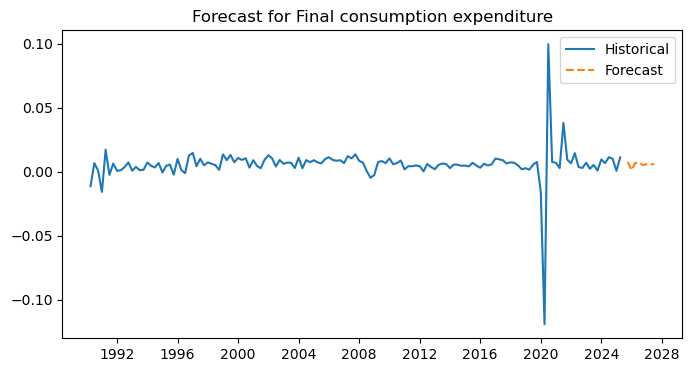

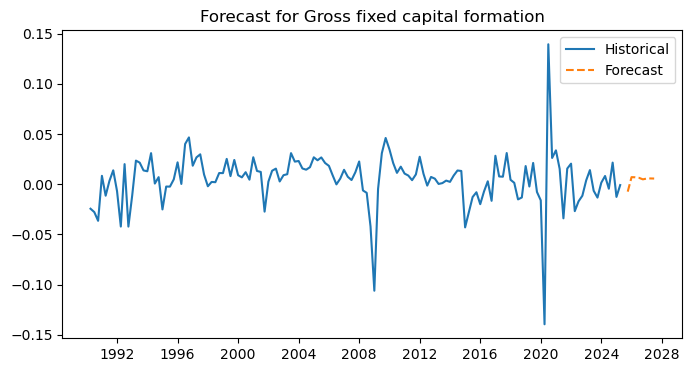

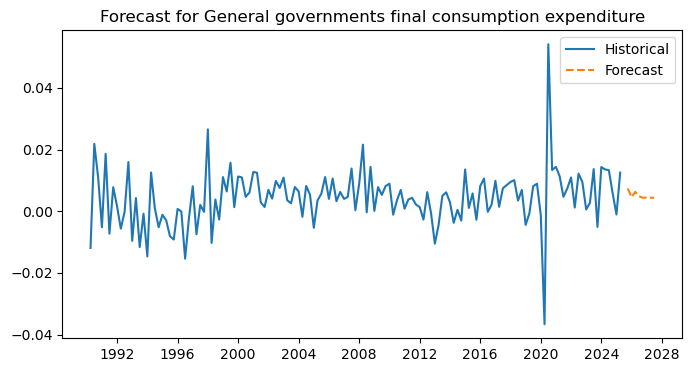

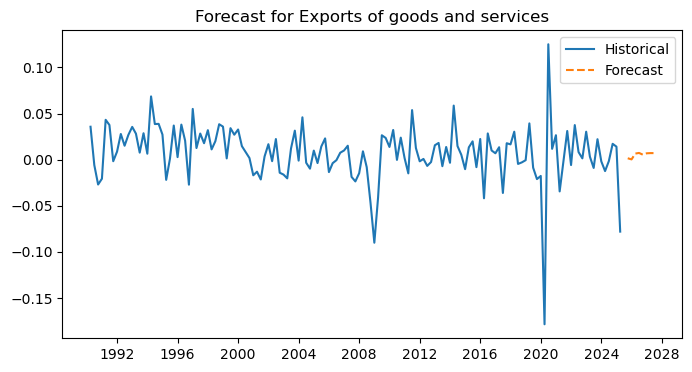

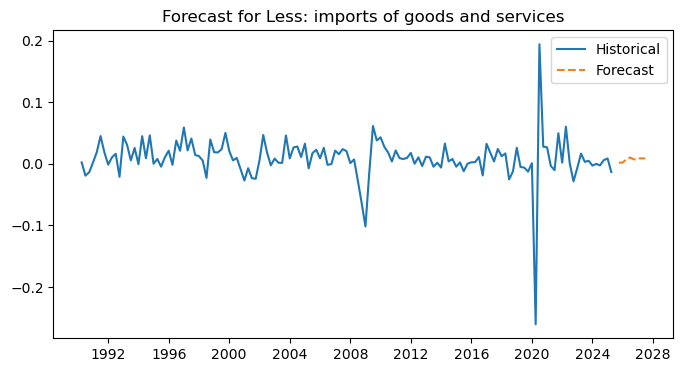

In [31]:
import matplotlib.pyplot as plt

for col in forecast_df.columns:
    plt.figure(figsize=(8,4))
    plt.plot(gdp_block_growth[col], label='Historical')
    plt.plot(forecast_df[col], label='Forecast', linestyle='--')
    plt.title(f"Forecast for {col}")
    plt.legend()
    plt.show()

In [32]:
last_level = gdp_block_level.iloc[-1].copy()
last_level

Estimates
Final consumption expenditure                        2004878
Gross fixed capital formation                         511490
General governments final consumption expenditure     554367
Exports of goods and services                         698086
Less: imports of goods and services                   793594
Name: 2025-04-01 00:00:00, dtype: int64

In [33]:
level_forecast = pd.DataFrame(index=forecast_df.index, columns=forecast_df.columns, dtype=float)


current = last_level.copy()
for i, idx in enumerate(forecast_df.index):
    current = current * (1.0 + forecast_df.iloc[i])
    level_forecast.loc[idx] = current

level_forecast.head()

Estimates,Final consumption expenditure,Gross fixed capital formation,General governments final consumption expenditure,Exports of goods and services,Less: imports of goods and services
2025Q3,2.020177e+06,507685.700399,558463.775725,699180.526312,795191.425369
2025Q4,2.022886e+06,511248.591523,560992.359205,699419.948813,796928.563254
2026Q1,2.036928e+06,514763.631260,564514.227085,704061.491116,802939.797245
2026Q2,2.051158e+06,518007.864902,567262.355408,709226.192903,811246.790814
2026Q3,2.061970e+06,520508.805425,569728.214699,713079.021600,817074.922402


In [34]:
import_col = [c for c in level_forecast.columns if "imports of goods and services" in c.lower()][0]


total_gdp_level = (
    level_forecast["Final consumption expenditure"]
    + level_forecast["Gross fixed capital formation"]
    + level_forecast.filter(like="final consumption", axis=1).filter(like="government", axis=1).iloc[:,0]  # 政府最终消费
    + level_forecast["Exports of goods and services"]
    - level_forecast[import_col]
)

total_gdp_level.name = "GDP (level, chained 2017$)"
total_gdp_level.head()

2025Q3    2.990316e+06
2025Q4    2.997618e+06
2026Q1    3.017328e+06
2026Q2    3.034408e+06
2026Q3    3.048212e+06
Freq: Q-DEC, Name: GDP (level, chained 2017$), dtype: float64

In [ ]:
total_gdp_growth = np.log(total_gdp_level).diff()
total_gdp_growth.name = "GDP growth (Δlog)"
total_gdp_growth.dropna().head()

2025Q4    0.002439
2026Q1    0.006554
2026Q2    0.005645
2026Q3    0.004539
2026Q4    0.005039
Freq: Q-DEC, Name: GDP growth (Δlog), dtype: float64

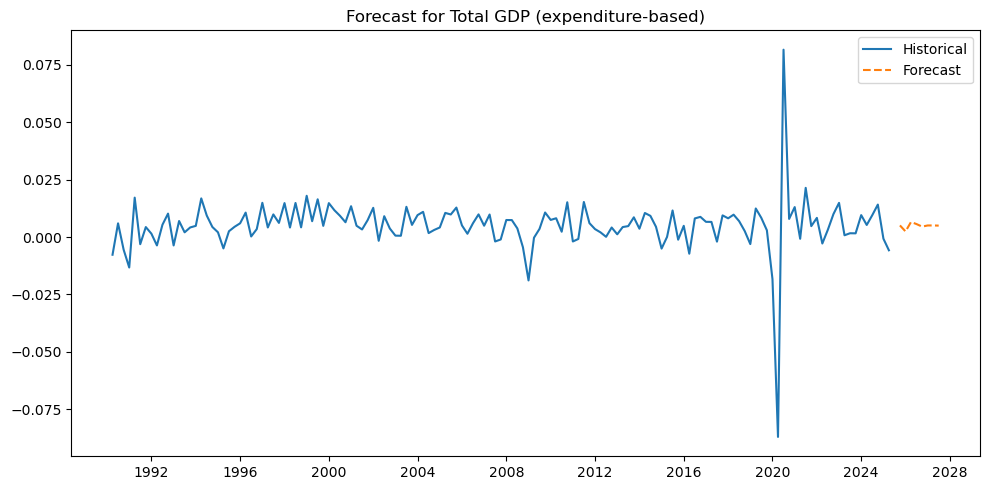

In [39]:


hist_total_level = (
    gdp_block_level["Final consumption expenditure"]
  + gdp_block_level["Gross fixed capital formation"]
  + gdp_block_level["General governments final consumption expenditure"]
  + gdp_block_level["Exports of goods and services"]
  - gdp_block_level["Less: imports of goods and services"]
)


hist_total_growth = np.log(hist_total_level).diff().dropna()


fc_total_level = (
    level_forecast["Final consumption expenditure"]
  + level_forecast["Gross fixed capital formation"]
  + level_forecast["General governments final consumption expenditure"]
  + level_forecast["Exports of goods and services"]
  - level_forecast["Less: imports of goods and services"]
)


combo_level = pd.concat([hist_total_level.iloc[-1:], fc_total_level])
fc_total_growth = np.log(combo_level).diff().iloc[1:] 


hist_idx = hist_total_growth.index.to_timestamp(how="end") if isinstance(hist_total_growth.index, pd.PeriodIndex) else hist_total_growth.index
fc_idx   = fc_total_growth.index.to_timestamp(how="end")   if isinstance(fc_total_growth.index,   pd.PeriodIndex) else fc_total_growth.index

plt.figure(figsize=(10,5))
plt.plot(hist_idx, hist_total_growth, label="Historical")          
plt.plot(fc_idx,   fc_total_growth,   linestyle="--", label="Forecast")  
plt.title("Forecast for Total GDP (expenditure-based)")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\2353328134.py:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  iq_mom = infl_mom.dropna().resample("Q").mean()
C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\2353328134.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  iq_yoy = infl_yoy.dropna().resample("Q").mean()


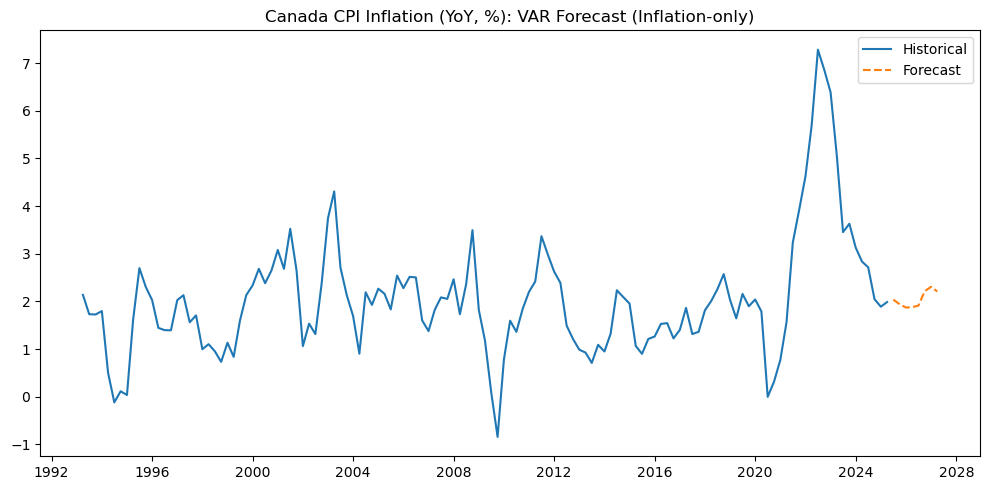

In [ ]:
# CPI → Canada, All-items
cpi = pd.read_csv("Inflation.csv")[["REF_DATE","GEO","Products and product groups","VALUE"]]
cpi = cpi[(cpi["GEO"]=="Canada") & (cpi["Products and product groups"]=="All-items")].copy()
cpi["REF_DATE"] = pd.to_datetime(cpi["REF_DATE"])
cpi = cpi.sort_values("REF_DATE").set_index("REF_DATE").rename(columns={"VALUE":"CPI"})

# Monthly MoM% and YoY%
infl_mom = (np.log(cpi["CPI"]) - np.log(cpi["CPI"].shift(1))) * 100
infl_yoy = (np.log(cpi["CPI"]) - np.log(cpi["CPI"].shift(12))) * 100

# Quarterly (average)
iq_mom = infl_mom.dropna().resample("Q").mean()
iq_yoy = infl_yoy.dropna().resample("Q").mean()
iq_mom.index = iq_mom.index.to_period("Q")
iq_yoy.index = iq_yoy.index.to_period("Q")

# VAR dataset: inflation-only (YoY & MoM)
var_data = pd.concat([iq_yoy.rename("Infl_YoY_%"), iq_mom.rename("Infl_MoM_%")], axis=1).dropna()

# Fit VAR
sel = VAR(var_data).select_order(8)
lag = max(1, sel.selected_orders.get("aic", 2))
fit = VAR(var_data).fit(lag)

# Forecast
h = 8
yhat = fit.forecast(var_data.values[-lag:], steps=h)
fc_idx = pd.period_range(var_data.index[-1]+1, periods=h, freq="Q")
fc = pd.DataFrame(yhat, columns=var_data.columns, index=fc_idx)

# Plot: YoY only
hist = var_data.to_timestamp("Q")
fut  = fc.to_timestamp("Q")
plt.figure(figsize=(10,5))
plt.plot(hist.index, hist["Infl_YoY_%"], label="Historical")
plt.plot(fut.index,  fut["Infl_YoY_%"], linestyle="--", label="Forecast")
plt.title("Canada CPI Inflation (YoY, %): VAR Forecast (Inflation-only)")
plt.legend(); plt.tight_layout(); plt.show()

In [50]:
print("lag (selected):", lag)
print("lag (fit.k_ar):", fit.k_ar)
print(sel.summary())

lag (selected): 8
lag (fit.k_ar): 8
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -3.266      -3.220     0.03816      -3.247
1      -5.095      -4.956    0.006129      -5.038
2      -5.402      -5.171    0.004509      -5.308
3      -6.286      -5.963    0.001862      -6.155
4      -6.396      -5.980    0.001669      -6.227
5      -6.512      -6.004    0.001487      -6.305
6      -6.465      -5.865    0.001559      -6.221
7      -6.717     -6.023*    0.001214     -6.435*
8     -6.726*      -5.940   0.001204*      -6.406
-------------------------------------------------


In [ ]:
print(fit.is_stable())
print(fit.roots) 

True
[ 4.2964697 -0.j         -1.26047078+0.8193306j  -1.26047078-0.8193306j
 -0.91085167+0.93526031j -0.91085167-0.93526031j  1.24752342-0.j
 -1.00991733+0.63379071j -1.00991733-0.63379071j  1.06879054+0.49713113j
  1.06879054-0.49713113j -0.52423984+1.001158j   -0.52423984-1.001158j
  0.74411672+0.84486558j  0.74411672-0.84486558j  0.44118693+1.00355731j
  0.44118693-1.00355731j]


In [52]:
print(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Oct, 2025
Time:                     17:22:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.93996
Nobs:                     121.000    HQIC:                  -6.40649
Log likelihood:           97.5126    FPE:                 0.00120436
AIC:                     -6.72555    Det(Omega_mle):     0.000925909
--------------------------------------------------------------------
Results for equation Infl_YoY_%
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.237881         0.097870            2.431           0.015
L1.Infl_YoY_%        -0.250265         0.211297           -1.184           0.236
L1.Infl_MoM_%         3.700723         0.495058        

In [54]:
employment = pd.read_csv("employment.csv")
employment.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Products and product groups', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

selected_lag: 8 | stable: True


C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\1252648259.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  emp_yoy_q = emp_yoy_m.dropna().resample("Q").mean()
C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\1252648259.py:23: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  emp_mom_q = emp_mom_m.dropna().resample("Q").mean()


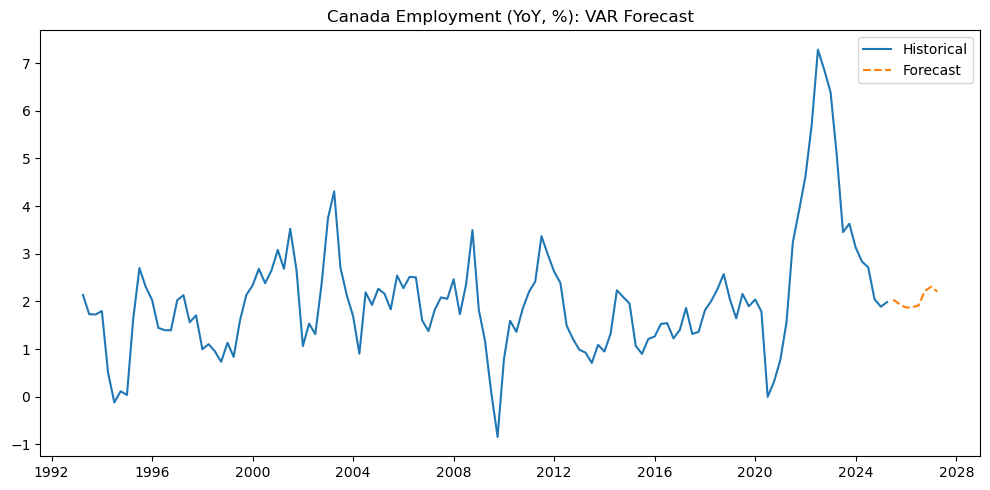

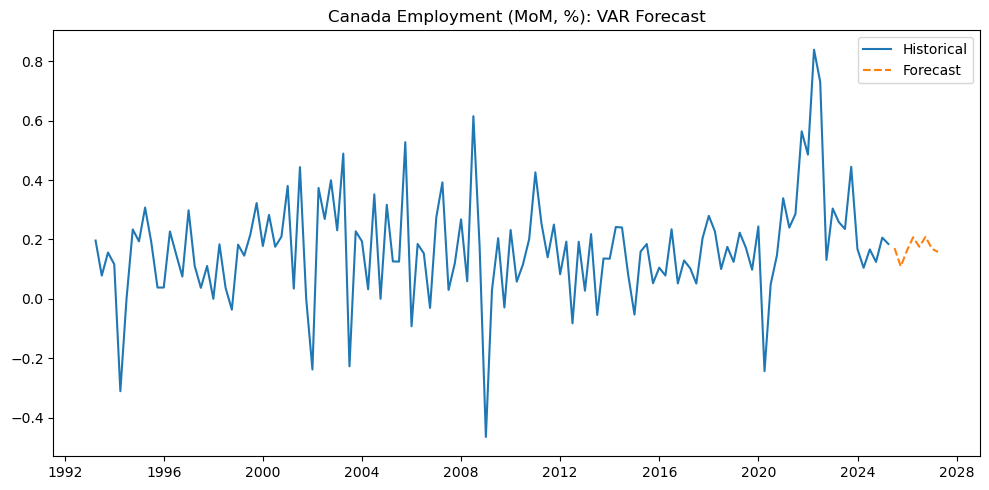

In [56]:

emp = pd.read_csv("employment.csv")
emp = emp[emp["GEO"]=="Canada"].copy()
emp["REF_DATE"] = pd.to_datetime(emp["REF_DATE"])
emp = emp.sort_values("REF_DATE")

main_name = None
cands = emp["Products and product groups"].dropna().unique().tolist()
if "Employment" in cands:
    main_name = "Employment"
else:
    cand_list = [c for c in cands if "employment" in c.lower()]
    main_name = cand_list[0] if cand_list else cands[0]

emp = emp[emp["Products and product groups"]==main_name][["REF_DATE","VALUE"]]
emp = emp.set_index("REF_DATE").rename(columns={"VALUE":"EMP"}).astype(float)


emp_yoy_m = (np.log(emp["EMP"]) - np.log(emp["EMP"].shift(12))) * 100
emp_mom_m = (np.log(emp["EMP"]) - np.log(emp["EMP"].shift(1 ))) * 100


emp_yoy_q = emp_yoy_m.dropna().resample("Q").mean()
emp_mom_q = emp_mom_m.dropna().resample("Q").mean()
emp_yoy_q.index = emp_yoy_q.index.to_period("Q")
emp_mom_q.index = emp_mom_q.index.to_period("Q")

var_data = pd.concat([emp_yoy_q.rename("Emp_YoY_%"),
                      emp_mom_q.rename("Emp_MoM_%")], axis=1).dropna()


T, k = var_data.shape
maxlags_safe = max(1, min(8, T // (k + 1) - 1))
sel = VAR(var_data).select_order(maxlags_safe)
lag = max(1, sel.selected_orders.get("aic", 2))
fit = VAR(var_data).fit(lag)

h = 8
yhat = fit.forecast(var_data.values[-lag:], steps=h)
fc_idx = pd.period_range(var_data.index[-1]+1, periods=h, freq="Q")
emp_fc = pd.DataFrame(yhat, columns=var_data.columns, index=fc_idx)

print("selected_lag:", lag, "| stable:", fit.is_stable())


hist = var_data.to_timestamp("Q")
fut  = emp_fc.to_timestamp("Q")

plt.figure(figsize=(10,5))
plt.plot(hist.index, hist["Emp_YoY_%"], label="Historical")
plt.plot(fut.index,  fut["Emp_YoY_%"], linestyle="--", label="Forecast")
plt.title("Canada Employment (YoY, %): VAR Forecast")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist.index, hist["Emp_MoM_%"], label="Historical")
plt.plot(fut.index,  fut["Emp_MoM_%"], linestyle="--", label="Forecast")
plt.title("Canada Employment (MoM, %): VAR Forecast")
plt.legend(); plt.tight_layout(); plt.show()

In [58]:
pol = pd.read_csv("population.csv")
pol.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')

selected_lag: 8 | stable: False


C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\3406423.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pop_yoy_q = pop_yoy.dropna().resample("Q").mean()
C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\3406423.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pop_mom_q = pop_mom.dropna().resample("Q").mean()


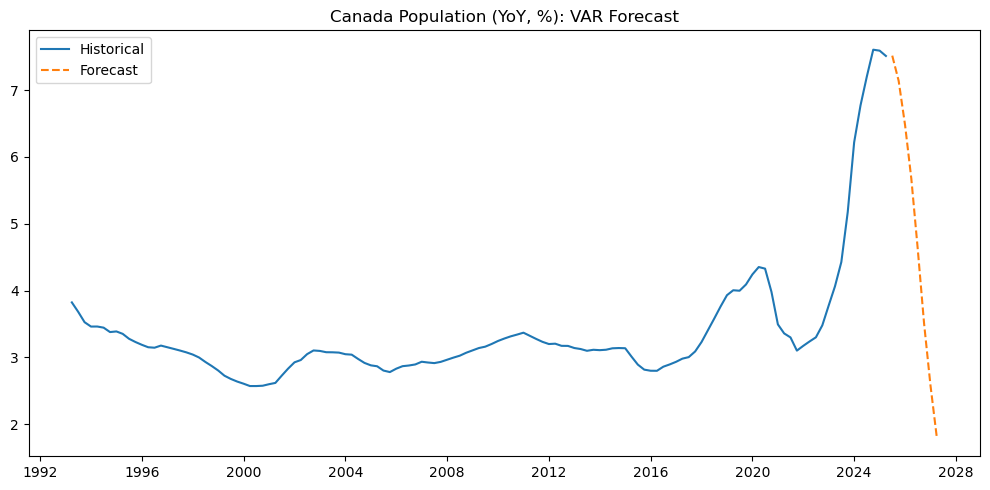

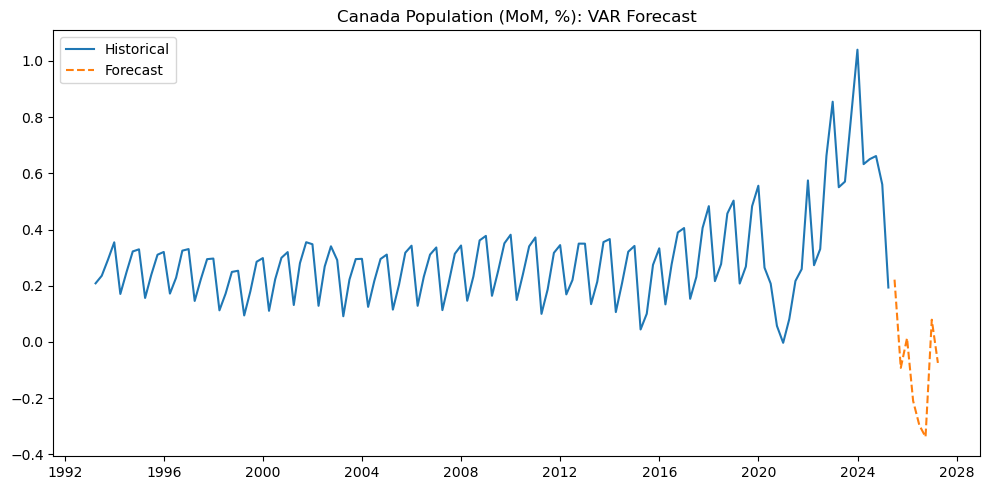

In [59]:

pop = pd.read_csv("population.csv")
pop = pop[pop["GEO"]=="Canada"][["REF_DATE","VALUE"]].copy()
pop["REF_DATE"] = pd.to_datetime(pop["REF_DATE"])
pop = pop.sort_values("REF_DATE").set_index("REF_DATE").rename(columns={"VALUE":"POP"}).astype(float)


pop_yoy = (np.log(pop["POP"]) - np.log(pop["POP"].shift(12))) * 100
pop_mom = (np.log(pop["POP"]) - np.log(pop["POP"].shift(1 ))) * 100

pop_yoy_q = pop_yoy.dropna().resample("Q").mean()
pop_mom_q = pop_mom.dropna().resample("Q").mean()
pop_yoy_q.index = pop_yoy_q.index.to_period("Q")
pop_mom_q.index = pop_mom_q.index.to_period("Q")

var_data = pd.concat([pop_yoy_q.rename("Pop_YoY_%"),
                      pop_mom_q.rename("Pop_MoM_%")], axis=1).dropna()


T, k = var_data.shape
maxlags_safe = max(1, min(8, T // (k + 1) - 1))
sel = VAR(var_data).select_order(maxlags_safe)
lag = max(1, sel.selected_orders.get("aic", 2))
fit = VAR(var_data).fit(lag)

h = 8
yhat = fit.forecast(var_data.values[-lag:], steps=h)
fc_idx = pd.period_range(var_data.index[-1]+1, periods=h, freq="Q")
pop_fc = pd.DataFrame(yhat, columns=var_data.columns, index=fc_idx)

print("selected_lag:", lag, "| stable:", fit.is_stable())


hist = var_data.to_timestamp("Q")
fut  = pop_fc.to_timestamp("Q")

plt.figure(figsize=(10,5))
plt.plot(hist.index, hist["Pop_YoY_%"], label="Historical")
plt.plot(fut.index,  fut["Pop_YoY_%"], linestyle="--", label="Forecast")
plt.title("Canada Population (YoY, %): VAR Forecast")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist.index, hist["Pop_MoM_%"], label="Historical")
plt.plot(fut.index,  fut["Pop_MoM_%"], linestyle="--", label="Forecast")
plt.title("Canada Population (MoM, %): VAR Forecast")
plt.legend(); plt.tight_layout(); plt.show()

chosen lag: 6 | stable: True


C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\3678002316.py:10: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  pop_yoy_q = pop_yoy.dropna().resample("Q-DEC").mean()
C:\Users\logc0\AppData\Local\Temp\ipykernel_32060\3678002316.py:11: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  pop_mom_q = pop_mom.dropna().resample("Q-DEC").mean()


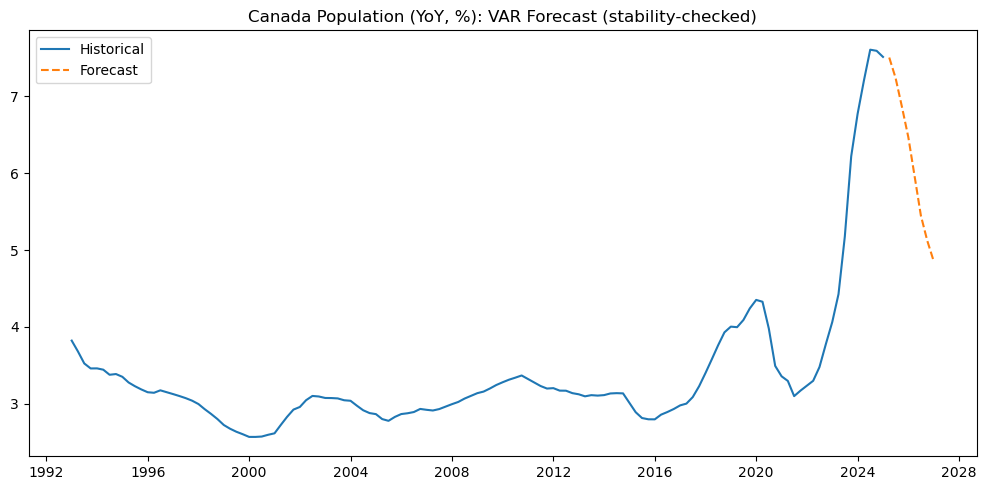

In [61]:
pop = pd.read_csv("population.csv")
pop = pop[pop["GEO"]=="Canada"][["REF_DATE","VALUE"]].copy()
pop["REF_DATE"] = pd.to_datetime(pop["REF_DATE"])
pop = pop.sort_values("REF_DATE").set_index("REF_DATE").rename(columns={"VALUE":"POP"}).astype(float)

pop_yoy = (np.log(pop["POP"]) - np.log(pop["POP"].shift(12))) * 100
pop_mom = (np.log(pop["POP"]) - np.log(pop["POP"].shift(1 ))) * 100


pop_yoy_q = pop_yoy.dropna().resample("Q-DEC").mean()
pop_mom_q = pop_mom.dropna().resample("Q-DEC").mean()
pop_yoy_q.index = pop_yoy_q.index.to_period("Q-DEC")
pop_mom_q.index = pop_mom_q.index.to_period("Q-DEC")

var_data = pd.concat([pop_yoy_q.rename("Pop_YoY_%"),
                      pop_mom_q.rename("Pop_MoM_%")], axis=1).dropna()

T, k = var_data.shape
maxlags_safe = max(1, min(8, T // (k + 1) - 1))  # estimation limit

def choose_stable_var(data, maxlags=maxlags_safe, ic="bic"):
    for p in range(maxlags, 0, -1):              # try from high to low
        fit = VAR(data).fit(p)
        if fit.is_stable():
            return fit
    # if none stable, fall back to p=1
    return VAR(data).fit(1)


fit_try = VAR(var_data).select_order(maxlags_safe)
p0_bic  = max(1, fit_try.selected_orders.get("bic", 1))
p0_bic  = min(p0_bic, maxlags_safe)
fit = choose_stable_var(var_data, max(p0_bic, 2))   # start near BIC, allow step-down

print("chosen lag:", fit.k_ar, "| stable:", fit.is_stable())

h = 8
yhat = fit.forecast(var_data.values[-fit.k_ar:], steps=h)
fc_idx = pd.period_range(var_data.index[-1] + 1, periods=h, freq=var_data.index.freq)
pop_fc = pd.DataFrame(yhat, columns=var_data.columns, index=fc_idx)


hist = var_data.to_timestamp()
fut  = pop_fc.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(hist.index, hist["Pop_YoY_%"], label="Historical")
plt.plot(fut.index,  fut["Pop_YoY_%"], linestyle="--", label="Forecast")
plt.title("Canada Population (YoY, %): VAR Forecast (stability-checked)")
plt.legend(); plt.tight_layout(); plt.show()